In [35]:
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch

In [36]:
h2o.init(ip="localhost", port=54321)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,1 hour 38 mins
H2O cluster timezone:,America/Chicago
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.1.1
H2O cluster version age:,1 month
H2O cluster name:,H2O_from_python_mike_gghk27
H2O cluster total nodes:,1
H2O cluster free memory:,13.36 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"


In [37]:
#h2o.remove_all()

In [38]:
train = h2o.import_file("train.csv")
train

Parse progress: |█████████████████████████████████████████████████████████| 100%


attended_clean,interview_date_mo,client_name_clean,industry_clean,location_clean,position_to_be_closed_clean,gender_clean,current_location_clean,job_location_clean,interview_venue_clean,marital_clean,interview_type_clean,candidate_native_location_clean,skillset_clean,q_start_time_clean,q_unsch_mtgs_clean,q_call_3hrs_clean,q_alt_number_clean,q_resume_clean,q_venue_clean,q_call_letter_clean,q_total,name,fold,interview_date_mo_te,industry_clean_te,location_clean_te,position_to_be_closed_clean_te,gender_clean_te,current_location_clean_te,job_location_clean_te,interview_venue_clean_te,marital_clean_te,interview_type_clean_te,candidate_native_location_clean_te,skillset_clean_te,q_start_time_clean_te,q_unsch_mtgs_clean_te,q_call_3hrs_clean_te,q_alt_number_clean_te,q_resume_clean_te,q_venue_clean_te,q_call_letter_clean_te,q_total_te
0,2,HOSPIRA,PHARMACEUTICALS,CHENNAI,NICHE,MALE,CHENNAI,BANGALORE,OTHER,SINGLE,SCHEDULED_WALKIN,OTHER,OTHER,1,1,1,1,1,1,1,7,Candidate 2,2,0.582116,0.572553,0.600293,0.664445,0.640635,0.600293,0.698866,0.764651,0.658907,0.637438,0.68439,0.680327,0.714402,0.696791,0.684997,0.700882,0.700687,0.697808,0.698484,0.725309
0,2,HOSPIRA,PHARMACEUTICALS,CHENNAI,NICHE,MALE,CHENNAI,BANGALORE,OTHER,MARRIED,SCHEDULED_WALKIN,CHENNAI,OTHER,1,1,1,0,1,1,1,6,Candidate 5,1,0.413331,0.607185,0.601626,0.731784,0.638566,0.601626,0.682921,0.764651,0.629567,0.609618,0.590276,0.652955,0.713908,0.706164,0.701182,0.39953,0.704964,0.705565,0.710305,0.495421
0,6,OTHER,OTHER,BANGALORE,NICHE,MALE,BANGALORE,BANGALORE,BANGALORE,SINGLE,SCHEDULED_WALKIN,OTHER,OTHER,0,1,1,1,1,1,0,5,Candidate 21,2,0.658678,0.693536,0.701156,0.662421,0.63861,0.701156,0.696842,0.702627,0.656882,0.635414,0.682365,0.678302,0.426677,0.694767,0.682972,0.698857,0.698662,0.695784,0.450903,0.315127
0,6,OTHER,OTHER,BANGALORE,NICHE,MALE,BANGALORE,BANGALORE,BANGALORE,SINGLE,SCHEDULED_WALKIN,OTHER,OTHER,1,1,1,0,0,1,1,5,Candidate 25,0,0.680989,0.71346,0.660763,0.685432,0.64445,0.660763,0.6542,0.667099,0.660141,0.646412,0.680724,0.66729,0.746717,0.728096,0.718179,0.416006,0.40586,0.726861,0.739062,0.231978
0,6,OTHER,OTHER,BANGALORE,NICHE,MALE,BANGALORE,BANGALORE,BANGALORE,SINGLE,SCHEDULED_WALKIN,OTHER,OTHER,0,0,1,1,1,1,0,4,Candidate 26,1,0.664661,0.697816,0.674568,0.728297,0.635078,0.674568,0.679433,0.682256,0.633094,0.606131,0.6586,0.649468,0.374484,0.382004,0.697695,0.701745,0.701477,0.702078,0.383825,0.636859
0,6,OTHER,OTHER,BANGALORE,NICHE,MALE,BANGALORE,BANGALORE,BANGALORE,MARRIED,SCHEDULED_WALKIN,BANGALORE,OTHER,0,1,1,1,1,1,0,5,Candidate 27,2,0.654235,0.689093,0.696713,0.657977,0.634167,0.696713,0.692399,0.698184,0.599081,0.630971,0.706517,0.673859,0.422234,0.690323,0.678529,0.694414,0.694219,0.69134,0.44646,0.310684
0,6,OTHER,OTHER,BANGALORE,NICHE,MALE,BANGALORE,BANGALORE,BANGALORE,SINGLE,SCHEDULED_WALKIN,BANGALORE,OTHER,0,1,1,1,0,1,0,4,Candidate 28,1,0.664843,0.697998,0.67475,0.728479,0.635261,0.67475,0.679615,0.682438,0.633276,0.606313,0.706401,0.64965,0.374666,0.702859,0.697877,0.701928,0.390717,0.70226,0.384007,0.636859
0,6,STANDARD CHARTERED BANK,BFSI,CHENNAI,NICHE,FEMALE,CHENNAI,CHENNAI,CHENNAI,SINGLE,SCHEDULED_WALKIN,OTHER,OTHER,1,1,1,0,1,1,0,5,Candidate 32,2,0.653541,0.636799,0.593132,0.657284,0.62559,0.593132,0.596579,0.596536,0.651746,0.630277,0.677229,0.673166,0.707241,0.68963,0.677836,0.443436,0.693526,0.690647,0.445766,0.30999
0,6,STANDARD CHARTERED BANK,BFSI,CHENNAI,NICHE,MALE,CHENNAI,CHENNAI,CHENNAI,MARRIED,SCHEDULED_WALKIN,CHENNAI,OTHER,1,1,1,1,1,1,1,7,Candidate 34,0,0.666029,0.639754,0.606447,0.670472,0.62949,0.606447,0.612108,0.607777,0.610181,0.631452,0.587779,0.65233,0.731758,0.713137,0.703219,0.714796,0.714094,0.711901,0.724103,0.751359
0,6,STANDARD CHARTERED BANK,BFSI,CHENNAI,NICHE,MALE,CHENNAI,CHENNAI,CHENNAI,MARRIED,SCHEDULED_WALKIN,CHENNAI,OTHER,1,1,1,0,1,0,1,5,Candidate 35,1,0.681182,0.644447,0.61466,0.744818,0.6516,0.61466,0.620789,0.616343,0.642601,0.622652,0.60331,0.665989,0.726942,0.719198,0.714216,0.412564,0.717998,0.402821,0.723339,0.1959

In [39]:
test = h2o.import_file("test.csv")
test

Parse progress: |█████████████████████████████████████████████████████████| 100%


attended_clean,interview_date_mo,client_name_clean,industry_clean,location_clean,position_to_be_closed_clean,gender_clean,current_location_clean,job_location_clean,interview_venue_clean,marital_clean,interview_type_clean,candidate_native_location_clean,skillset_clean,q_start_time_clean,q_unsch_mtgs_clean,q_call_3hrs_clean,q_alt_number_clean,q_resume_clean,q_venue_clean,q_call_letter_clean,q_total,name,interview_date_mo_te,industry_clean_te,location_clean_te,position_to_be_closed_clean_te,gender_clean_te,current_location_clean_te,job_location_clean_te,interview_venue_clean_te,marital_clean_te,interview_type_clean_te,candidate_native_location_clean_te,skillset_clean_te,q_start_time_clean_te,q_unsch_mtgs_clean_te,q_call_3hrs_clean_te,q_alt_number_clean_te,q_resume_clean_te,q_venue_clean_te,q_call_letter_clean_te,q_total_te
0,2,HOSPIRA,PHARMACEUTICALS,CHENNAI,NICHE,MALE,CHENNAI,OTHER,OTHER,SINGLE,SCHEDULED_WALKIN,OTHER,OTHER,1,1,1,1,1,1,1,7,Candidate 1,0.522936,0.577236,0.604502,0.691824,0.637978,0.604502,0.843137,0.771429,0.648601,0.62766,0.672414,0.663636,0.721649,0.707143,0.6983,0.708696,0.708333,0.706897,0.712627,0.735791
0,2,HOSPIRA,PHARMACEUTICALS,CHENNAI,NICHE,MALE,CHENNAI,CHENNAI,OTHER,SINGLE,SCHEDULED_WALKIN,CHENNAI,OTHER,0,0,0,0,0,0,0,0,Candidate 3,0.522936,0.577236,0.604502,0.691824,0.637978,0.604502,0.60961,0.771429,0.648601,0.62766,0.585586,0.663636,0.394958,0.410138,0.43128,0.418502,0.411765,0.41629,0.407895,0.432039
0,2,HOSPIRA,PHARMACEUTICALS,CHENNAI,NICHE,MALE,CHENNAI,CHENNAI,OTHER,SINGLE,SCHEDULED_WALKIN,CHENNAI,OTHER,1,1,0,1,0,1,1,5,Candidate 4,0.522936,0.577236,0.604502,0.691824,0.637978,0.604502,0.60961,0.771429,0.648601,0.62766,0.585586,0.663636,0.721649,0.707143,0.43128,0.708696,0.411765,0.706897,0.712627,0.24
0,6,OTHER,OTHER,BANGALORE,NICHE,FEMALE,BANGALORE,BANGALORE,BANGALORE,SINGLE,SCHEDULED_WALKIN,OTHER,OTHER,0,1,0,0,1,1,1,4,Candidate 12,0.666667,0.7,0.676991,0.691824,0.632432,0.676991,0.675,0.682243,0.648601,0.62766,0.672414,0.663636,0.394958,0.707143,0.43128,0.418502,0.708333,0.706897,0.712627,0
0,6,OTHER,OTHER,BANGALORE,NICHE,FEMALE,BANGALORE,BANGALORE,BANGALORE,SINGLE,SCHEDULED_WALKIN,BANGALORE,OTHER,0,1,1,0,1,1,1,5,Candidate 18,0.666667,0.7,0.676991,0.691824,0.632432,0.676991,0.675,0.682243,0.648601,0.62766,0.702479,0.663636,0.394958,0.707143,0.6983,0.418502,0.708333,0.706897,0.712627,0.24
0,6,STANDARD CHARTERED BANK,BFSI,CHENNAI,ROUTINE,MALE,CHENNAI,CHENNAI,CHENNAI,MARRIED,SCHEDULED_WALKIN,CHENNAI,ORACLE,1,1,1,1,1,1,0,6,Candidate 85,0.666667,0.640056,0.604502,0.62533,0.637978,0.604502,0.60961,0.606635,0.617391,0.62766,0.585586,0.62,0.721649,0.707143,0.6983,0.708696,0.708333,0.706897,0.407895,0.434783
0,6,STANDARD CHARTERED BANK,BFSI,CHENNAI,ROUTINE,MALE,CHENNAI,CHENNAI,CHENNAI,SINGLE,SCHEDULED_WALKIN,CHENNAI,ORACLE,0,1,1,0,1,1,1,5,Candidate 87,0.666667,0.640056,0.604502,0.62533,0.637978,0.604502,0.60961,0.606635,0.648601,0.62766,0.585586,0.62,0.394958,0.707143,0.6983,0.418502,0.708333,0.706897,0.712627,0.24
0,5,STANDARD CHARTERED BANK,BFSI,CHENNAI,ROUTINE,MALE,CHENNAI,CHENNAI,CHENNAI,SINGLE,SCHEDULED_WALKIN,HYDERABAD,ACCOUNTING,1,1,1,1,1,1,1,7,Candidate 93,0.74026,0.640056,0.604502,0.62533,0.637978,0.604502,0.60961,0.606635,0.648601,0.62766,0.691667,0.662162,0.721649,0.707143,0.6983,0.708696,0.708333,0.706897,0.712627,0.735791
0,5,STANDARD CHARTERED BANK,BFSI,CHENNAI,ROUTINE,MALE,CHENNAI,CHENNAI,CHENNAI,MARRIED,SCHEDULED_WALKIN,CHENNAI,ACCOUNTING,1,1,1,1,1,1,1,7,Candidate 96,0.74026,0.640056,0.604502,0.62533,0.637978,0.604502,0.60961,0.606635,0.617391,0.62766,0.585586,0.662162,0.721649,0.707143,0.6983,0.708696,0.708333,0.706897,0.712627,0.735791
0,5,STANDARD CHARTERED BANK,BFSI,CHENNAI,ROUTINE,MALE,CHENNAI,CHENNAI,CHENNAI,MARRIED,SCHEDULED_WALKIN,HYDERABAD,ACCOUNTING,1,1,1,1,1,1,1,7,Candidate 97,0.74026,0.640056,0.604502,0.62533,0.637978,0.604502,0.60961,0.606635,0.617391,0.62766,0.691667,0.662162,0.721649,0.707143,0.6983,0.708696,0.708333,0.706897,0.712627,0.735791


In [40]:
target_encode_features = [
    'interview_date_mo',
    'industry_clean',
    'location_clean',
    'position_to_be_closed_clean',
    'gender_clean',
    'current_location_clean',
    'job_location_clean',
    'interview_venue_clean',
    'marital_clean',
    'interview_type_clean',
    'candidate_native_location_clean',
    'skillset_clean',
    'q_start_time_clean',
    'q_unsch_mtgs_clean',
    'q_call_3hrs_clean',
    'q_alt_number_clean',
    'q_resume_clean',
    'q_venue_clean',
    'q_call_letter_clean',
    'q_total',
]
response_col_name = 'attended_clean'

for f in target_encode_features:
    train[f] = train[f].asfactor()
    test[f] = test[f].asfactor()
    
response_col_name = 'attended_clean'
train[response_col_name] = train[response_col_name].asfactor()
test[response_col_name] = test[response_col_name].asfactor()

In [41]:
glm_model = H2OGeneralizedLinearEstimator(
    family = 'binomial', 
    fold_column='fold',
    #interactions=['traffic_index', 'subprime_credit_te']
)
glm_model.lambda_ = 0.001

glm_model.train(
    model_id='glm-test', 
    x=['fold'] + target_encode_features, 
    y=response_col_name, 
    fold_column='fold',
    training_frame=train,
    #validation_frame=valid
)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [42]:
glm_model.varimp(True)

,variable,relative_importance,scaled_importance,percentage
0,q_total.7,1.412616,1.000000,0.079618
1,job_location_clean.OTHER,1.234046,0.873589,0.069553
2,q_total.0,1.233342,0.873091,0.069514
3,q_total.4,0.948109,0.671173,0.053437
4,interview_date_mo.7,0.727322,0.514876,0.040993
...,...,...,...,...
70,q_alt_number_clean.1,0.000000,0.000000,0.000000
71,q_venue_clean.0,0.000000,0.000000,0.000000
72,q_venue_clean.1,0.000000,0.000000,0.000000
73,gender_clean.FEMALE,0.000000,0.000000,0.000000


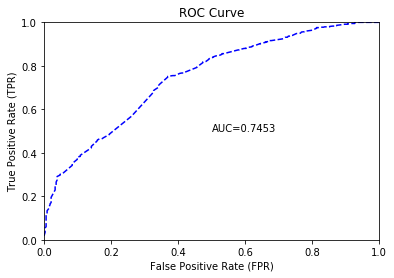

In [43]:
glm_orig_perf_train = glm_model.model_performance(train)
glm_orig_perf_train.plot()

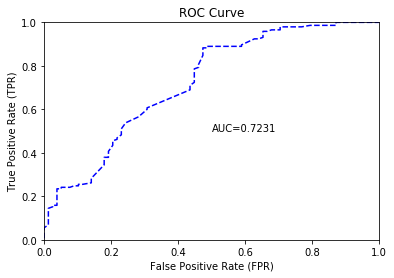

In [44]:
glm_orig_perf = glm_model.model_performance(test)
#best_xgb_orig_perf.auc()
glm_orig_perf.plot()


In [45]:
glm_orig_perf.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.40096087164462446: 


,,0,1,Error,Rate
0,0,23.0,55.0,0.7051,(55.0/78.0)
1,1,3.0,142.0,0.0207,(3.0/145.0)
2,Total,26.0,197.0,0.2601,(58.0/223.0)


In [46]:
glm_orig_perf


ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.18483899225344982
RMSE: 0.42992905490726
LogLoss: 0.5510680653072386
Null degrees of freedom: 222
Residual degrees of freedom: 172
Null deviance: 288.8724191692482
Residual deviance: 245.77635712702838
AIC: 347.7763571270284
AUC: 0.7231211317418214
AUCPR: 0.805643656491495
Gini: 0.4462422634836427

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.40096087164462446: 


,,0,1,Error,Rate
0,0,23.0,55.0,0.7051,(55.0/78.0)
1,1,3.0,142.0,0.0207,(3.0/145.0)
2,Total,26.0,197.0,0.2601,(58.0/223.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.400961,0.830409,92.0
1,max f2,0.262886,0.914250,105.0
2,max f0point5,0.611598,0.795031,70.0
3,max accuracy,0.611598,0.757848,70.0
4,max precision,0.964575,1.000000,0.0
5,max recall,0.262886,1.000000,105.0
6,max specificity,0.964575,1.000000,0.0
7,max absolute_mcc,0.611598,0.443977,70.0
8,max min_per_class_accuracy,0.695244,0.606897,55.0
9,max mean_per_class_accuracy,0.611598,0.704200,70.0



Gains/Lift Table: Avg response rate: 65.02 %, avg score: 66.00 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.022422,0.942042,1.537931,1.537931,1.000000,0.946549,1.000000,0.946549,0.034483,0.034483,53.793103,53.793103
1,,2,0.022422,0.941545,0.000000,1.537931,0.000000,0.000000,1.000000,0.946549,0.000000,0.034483,-100.000000,53.793103
2,,3,0.035874,0.924393,1.537931,1.537931,1.000000,0.929899,1.000000,0.940305,0.020690,0.055172,53.793103,53.793103
3,,4,0.049327,0.919069,1.025287,1.398119,0.666667,0.919069,0.909091,0.934514,0.013793,0.068966,2.528736,39.811912
4,,5,0.053812,0.914487,1.537931,1.409770,1.000000,0.916842,0.916667,0.933041,0.006897,0.075862,53.793103,40.977011
5,,6,0.107623,0.875708,1.409770,1.409770,0.916667,0.883311,0.916667,0.908176,0.075862,0.151724,40.977011,40.977011
6,,7,0.152466,0.836174,1.384138,1.402231,0.900000,0.854012,0.911765,0.892246,0.062069,0.213793,38.413793,40.223124
7,,8,0.201794,0.793181,0.838871,1.264521,0.545455,0.815046,0.822222,0.873375,0.041379,0.255172,-16.112853,26.452107
8,,9,0.300448,0.769092,1.118495,1.216572,0.727273,0.778870,0.791045,0.842343,0.110345,0.365517,11.849530,21.657231
9,,10,0.403587,0.713915,1.270465,1.230345,0.826087,0.736847,0.800000,0.815383,0.131034,0.496552,27.046477,23.034483


In [47]:
# save the model
glm_model_model_path = h2o.save_model(model=glm_model, path="./tmp/saved_model", force=True)
print(glm_model_model_path)

/home/mike/Repos/CaseStudies/GoHealth/tmp/saved_model/glm-test


In [48]:
x_ = ['fold'] + ['%s_te' % c for c in target_encode_features]

glm_model_te = H2OGeneralizedLinearEstimator(
    family = 'binomial', 
    fold_column='fold',
    #interactions=['traffic_index', 'subprime_credit_te']
)
glm_model_te.lambda_ = 0.001

glm_model_te.train(
    model_id='glm-test-te', 
    x=x_, 
    y=response_col_name, 
    fold_column='fold',
    training_frame=train,
    #validation_frame=valid
)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [49]:
glm_model_te.varimp(True)

,variable,relative_importance,scaled_importance,percentage
0,q_call_3hrs_clean_te,1.221650,1.000000,0.261868
1,q_start_time_clean_te,0.522110,0.427381,0.111917
2,q_total_te,0.456850,0.373962,0.097929
3,q_resume_clean_te,0.340823,0.278986,0.073058
4,q_unsch_mtgs_clean_te,0.293328,0.240108,0.062877
5,job_location_clean_te,0.281533,0.230453,0.060348
6,interview_venue_clean_te,0.235118,0.192459,0.050399
7,interview_type_clean_te,0.182650,0.149511,0.039152
8,candidate_native_location_clean_te,0.161967,0.132581,0.034719
9,q_call_letter_clean_te,0.148769,0.121777,0.031889


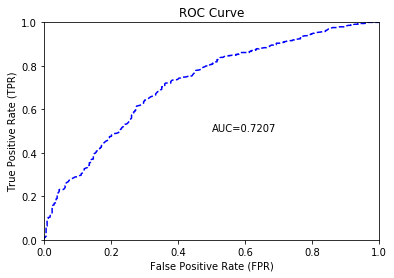

In [50]:
glm_te_perf_train = glm_model_te.model_performance(train)
glm_te_perf_train.plot()

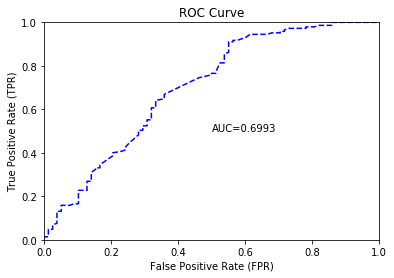

In [51]:
glm_te_perf = glm_model_te.model_performance(test)
#best_xgb_orig_perf.auc()
glm_te_perf.plot()


In [52]:
glm_te_perf.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4972461707410348: 


,,0,1,Error,Rate
0,0,30.0,48.0,0.6154,(48.0/78.0)
1,1,8.0,137.0,0.0552,(8.0/145.0)
2,Total,38.0,185.0,0.2511,(56.0/223.0)


In [53]:
glm_te_perf


ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.18954412392154707
RMSE: 0.4353666545815688
LogLoss: 0.5665928488808696
Null degrees of freedom: 222
Residual degrees of freedom: 203
Null deviance: 288.8724191692482
Residual deviance: 252.70041060086785
AIC: 292.7004106008678
AUC: 0.6992926613616269
AUCPR: 0.7674893386690615
Gini: 0.39858532272325387

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4972461707410348: 


,,0,1,Error,Rate
0,0,30.0,48.0,0.6154,(48.0/78.0)
1,1,8.0,137.0,0.0552,(8.0/145.0)
2,Total,38.0,185.0,0.2511,(56.0/223.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.497246,0.830303,103.0
1,max f2,0.327186,0.915404,126.0
2,max f0point5,0.601447,0.781065,97.0
3,max accuracy,0.601447,0.748879,97.0
4,max precision,0.972504,1.000000,0.0
5,max recall,0.327186,1.000000,126.0
6,max specificity,0.972504,1.000000,0.0
7,max absolute_mcc,0.497246,0.417863,103.0
8,max min_per_class_accuracy,0.690235,0.641379,77.0
9,max mean_per_class_accuracy,0.601447,0.679531,97.0



Gains/Lift Table: Avg response rate: 65.02 %, avg score: 66.17 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.013453,0.938194,1.025287,1.025287,0.666667,0.952534,0.666667,0.952534,0.013793,0.013793,2.528736,2.528736
1,,2,0.022422,0.917819,1.537931,1.230345,1.000000,0.920423,0.800000,0.939690,0.013793,0.027586,53.793103,23.034483
2,,3,0.031390,0.907961,1.537931,1.318227,1.000000,0.913064,0.857143,0.932083,0.013793,0.041379,53.793103,31.822660
3,,4,0.040359,0.902843,0.768966,1.196169,0.500000,0.907167,0.777778,0.926546,0.006897,0.048276,-23.103448,19.616858
4,,5,0.053812,0.901043,1.537931,1.281609,1.000000,0.901518,0.833333,0.920289,0.020690,0.068966,53.793103,28.160920
5,,6,0.103139,0.828598,1.258307,1.270465,0.818182,0.870734,0.826087,0.896589,0.062069,0.131034,25.830721,27.046477
6,,7,0.165919,0.796398,1.098522,1.205405,0.714286,0.807306,0.783784,0.862806,0.068966,0.200000,9.852217,20.540541
7,,8,0.201794,0.774187,1.153448,1.196169,0.750000,0.783890,0.777778,0.848777,0.041379,0.241379,15.344828,19.616858
8,,9,0.322870,0.742193,1.196169,1.196169,0.777778,0.752203,0.777778,0.812562,0.144828,0.386207,19.616858,19.616858
9,,10,0.412556,0.729405,1.076552,1.170165,0.700000,0.733617,0.760870,0.795400,0.096552,0.482759,7.655172,17.016492


In [54]:
# save the model
glm_model_te_model_path = h2o.save_model(model=glm_model_te, path="./tmp/saved_model", force=True)
print(glm_model_te_model_path)

/home/mike/Repos/CaseStudies/GoHealth/tmp/saved_model/glm-test-te


In [55]:
x_ = ['fold'] + ['q_total_te', 'interview_type_clean_te', 'gender_clean_te', 
                 'candidate_native_location_clean_te', 'interview_date_mo_te']

glm_model_te_subset = H2OGeneralizedLinearEstimator(
    family = 'binomial', 
    fold_column='fold',
    #interactions=['traffic_index', 'subprime_credit_te']
)
glm_model_te_subset.lambda_ = 0.001

glm_model_te_subset.train(
    model_id='glm-test-te-subset', 
    x=x_, 
    y=response_col_name, 
    fold_column='fold',
    training_frame=train,
    #validation_frame=valid
)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [56]:
glm_model_te_subset.varimp(True)

,variable,relative_importance,scaled_importance,percentage
0,q_total_te,0.671461,1.000000,0.547332
1,candidate_native_location_clean_te,0.216175,0.321948,0.176212
2,interview_type_clean_te,0.212404,0.316331,0.173138
3,gender_clean_te,0.093329,0.138994,0.076076
4,interview_date_mo_te,0.033419,0.049771,0.027241


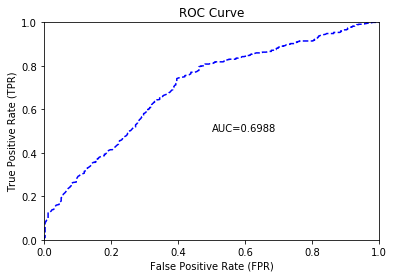

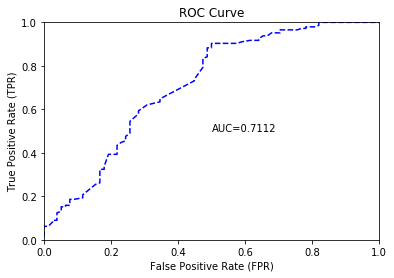

In [57]:
glm_te_subset_perf_train = glm_model_te_subset.model_performance(train)
glm_te_subset_perf = glm_model_te_subset.model_performance(test)
glm_te_subset_perf_train.plot()
glm_te_subset_perf.plot()

In [58]:
glm_te_subset_perf_train.auc()  # accuracy()[0][0]

0.6988486774445679

In [59]:
glm_te_subset_perf.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5397583652216044: 


,,0,1,Error,Rate
0,0,39.0,39.0,0.5,(39.0/78.0)
1,1,14.0,131.0,0.0966,(14.0/145.0)
2,Total,53.0,170.0,0.2377,(53.0/223.0)


In [60]:
glm_te_subset_perf


ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.18610346074966283
RMSE: 0.4313971033162634
LogLoss: 0.557116343763661
Null degrees of freedom: 222
Residual degrees of freedom: 217
Null deviance: 288.8724191692482
Residual deviance: 248.4738893185928
AIC: 260.4738893185928
AUC: 0.711184792219275
AUCPR: 0.7757582060162086
Gini: 0.42236958443855

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5397583652216044: 


,,0,1,Error,Rate
0,0,39.0,39.0,0.5,(39.0/78.0)
1,1,14.0,131.0,0.0966,(14.0/145.0)
2,Total,53.0,170.0,0.2377,(53.0/223.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.539758,0.831746,70.0
1,max f2,0.354134,0.918885,99.0
2,max f0point5,0.539758,0.793939,70.0
3,max accuracy,0.539758,0.762332,70.0
4,max precision,0.828202,1.000000,0.0
5,max recall,0.354134,1.000000,99.0
6,max specificity,0.828202,1.000000,0.0
7,max absolute_mcc,0.539758,0.452019,70.0
8,max min_per_class_accuracy,0.680615,0.648276,55.0
9,max mean_per_class_accuracy,0.539758,0.701724,70.0



Gains/Lift Table: Avg response rate: 65.02 %, avg score: 64.69 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.013453,0.824880,1.537931,1.537931,1.000000,0.827208,1.000000,0.827208,0.020690,0.020690,53.793103,53.793103
1,,2,0.022422,0.821146,1.537931,1.537931,1.000000,0.822707,1.000000,0.825408,0.013793,0.034483,53.793103,53.793103
2,,3,0.031390,0.818460,1.537931,1.537931,1.000000,0.819536,1.000000,0.823730,0.013793,0.048276,53.793103,53.793103
3,,4,0.040359,0.815538,1.537931,1.537931,1.000000,0.817624,1.000000,0.822373,0.013793,0.062069,53.793103,53.793103
4,,5,0.062780,0.813433,0.922759,1.318227,0.600000,0.813817,0.857143,0.819317,0.020690,0.082759,-7.724138,31.822660
5,,6,0.103139,0.804882,1.196169,1.270465,0.777778,0.808962,0.826087,0.815265,0.048276,0.131034,19.616858,27.046477
6,,7,0.152466,0.772878,1.118495,1.221298,0.727273,0.790742,0.794118,0.807331,0.055172,0.186207,11.849530,22.129817
7,,8,0.219731,0.766745,1.025287,1.161295,0.666667,0.767778,0.755102,0.795223,0.068966,0.255172,2.528736,16.129486
8,,9,0.322870,0.752198,1.337331,1.217529,0.869565,0.756957,0.791667,0.782999,0.137931,0.393103,33.733133,21.752874
9,,10,0.408072,0.740543,1.133212,1.199924,0.736842,0.743764,0.780220,0.774807,0.096552,0.489655,13.321234,19.992421


In [61]:
# save the model
glm_model_te_subset_model_path = h2o.save_model(model=glm_model_te_subset, path="./tmp/saved_model", force=True)
print(glm_model_te_subset_model_path)

/home/mike/Repos/CaseStudies/GoHealth/tmp/saved_model/glm-test-te-subset
